In [238]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import scipy.constants as c
from scipy import stats

from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib as mpl

In [210]:
path_rmsynth = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/rmsynth/'
fname_linpol = 'rmsynth_polint'
hdu_polint = fits.open(get_pkg_data_filename(path_rmsynth+fname_linpol+'.fits'))[0]
data_polint = hdu_polint.data

path_sigma = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/'
fname_sigma = 'Abell_85_Fits_Data_Mean_Std'
hdu_sigma = fits.open(get_pkg_data_filename(path_sigma+fname_sigma+'.fits'))[0]
data_sigma = hdu_sigma.data

path_rmsynth = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/rmsynth/'
fname_alpha = 'rmsynth_phi'
hdu_alpha = fits.open(get_pkg_data_filename(path_rmsynth+fname_alpha+'.fits'))[0]
data_alpha = hdu_alpha.data
wcs = WCS(hdu_alpha.header)

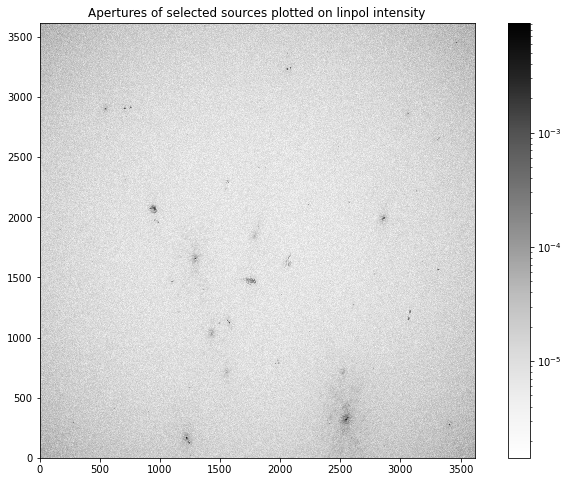

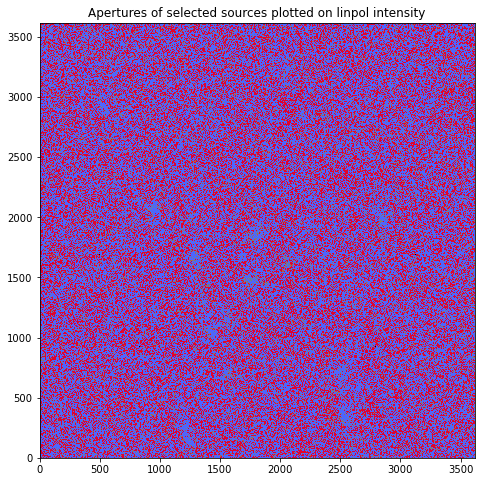

In [261]:
plt.figure(figsize=(12,8))
plt.title('Apertures of selected sources plotted on linpol intensity')
#plt.subplot(projection=wcs, slices=('x', 'y', 0, 0))
plt.imshow(data_polint.clip(min=0.0000001), cmap='Greys', origin='lower', norm=colors.LogNorm(), interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(12,8))
plt.title('Apertures of selected sources plotted on linpol intensity')
#plt.subplot(projection=wcs, slices=('x', 'y', 0, 0))
plt.imshow(rgb, origin='lower', interpolation='nearest')
plt.show()

In [265]:
colmap = cm.get_cmap('coolwarm')
rgb_uncor = colmap(data_alpha/30)
rgb_uncor = np.delete(rgb_uncor, 3, 2)
rgb_brightness = np.sqrt(0.2126*rgb_uncor[:,:,0]**2 + 0.2126*rgb_uncor[:,:,1]**2 + 0.0722*rgb_uncor[:,:,2]**2) #http://alienryderflex.com/hsp.html
rgb_brightness = np.array([rgb_brightness, rgb_brightness, rgb_brightness])
rgb_brightness = np.swapaxes(rgb_brightness, 0, 1)
rgb_brightness = np.swapaxes(rgb_brightness, 1, 2)
rgb = (rgb_uncor/rgb_brightness)/np.nanmax(rgb_uncor/rgb_brightness)

print(np.nanmax(rgb))

<ipython-input-265-33986ad1bb93>:8: RuntimeWarning: invalid value encountered in true_divide
  rgb = (rgb_uncor/rgb_brightness)/np.nanmax(rgb_uncor/rgb_brightness)


1.0


In [266]:
lum = np.array([data_polint, data_polint, data_polint])

lum = np.swapaxes(lum, 0, 1)
lum = np.swapaxes(lum, 1, 2)
lum_log = (5+np.log10(lum)).clip(min=0, max=3)
#rgb_lum = 1e2*lum*rgb/np.nanmax(lum)
rgb_lum_log = (lum_log)*rgb/np.nanmax(lum_log)

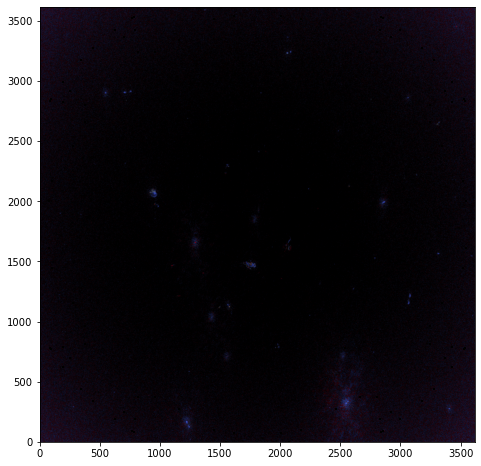

In [267]:
plt.figure(figsize=(12,8))
#plt.subplot(projection=wcs, slices=('x', 'y', 0, 0))
plt.imshow(rgb_lum_log, origin='lower')
#plt.xlim(1500, 2200)
#plt.ylim(1300, 2000)
#plt.colorbar(colmap)
plt.savefig('phi_sources_plot.pdf', dpi=500)

In [270]:
mpl.image.imsave('phi_sources_plot.png', rgb_lum_log)

In [248]:
lum_sigma = np.array([data_sigma, data_sigma, data_sigma])

lum_sigma = np.swapaxes(lum_sigma, 0, 1)
lum_sigma = np.swapaxes(lum_sigma, 1, 2)
lum_sigma_log = (np.log10(lum_sigma.clip(min=1e-3))).clip(min=0.2, max=1)-0.2
rgb_lum_sigma = 1e2*lum_sigma*rgb/np.nanmax(lum_sigma)
rgb_lum_sigma_log = (lum_sigma_log)*rgb/np.nanmax(lum_sigma_log)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


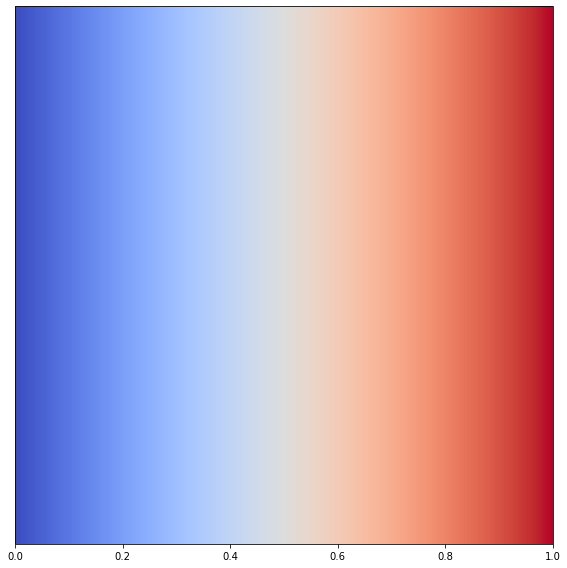

In [249]:
fig, ax = plt.subplots(figsize=(12, 8))

#plt.subplot(projection=wcs, slices=('x', 'y', 0, 0))
ax.imshow(rgb_lum_sigma_log, origin='lower')
#plt.xlim(1500, 2200)
#plt.ylim(1300, 2000)
fig.tight_layout()
#plt.colorbar(colmap)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=colmap, orientation='horizontal')
fig.savefig('phi_compactsources_plot.pdf', dpi=500)